In [1]:
import pandas as pd
import matplotlib.pyplot as plt
comp=pd.read_excel("comp.xlsx")
comp.head()
comp = comp.drop(['Unnamed: 0'],axis=1)
comp.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


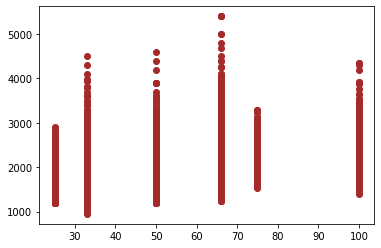

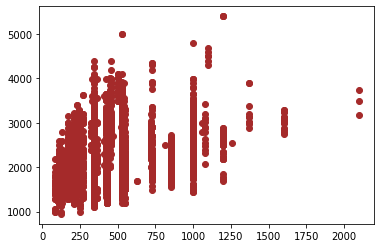

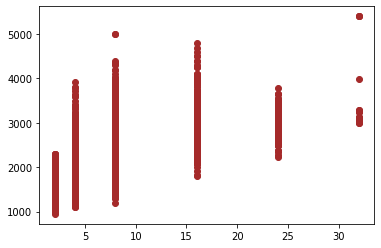

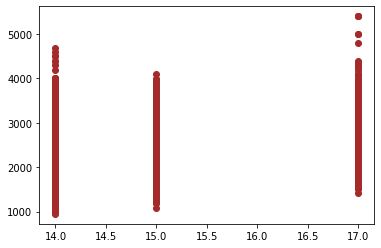

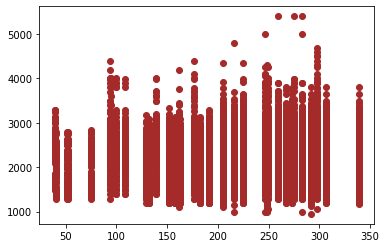

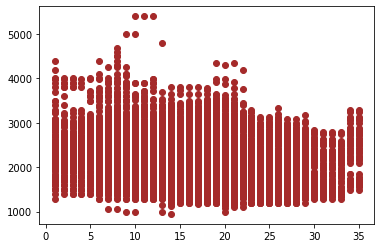

In [25]:
#EDA
comp.shape
comp.dtypes
comp.isna
comp.describe()


plt.scatter(x=comp['speed'],y=comp['price'],color="brown")
plt.show()
plt.scatter(x=comp['hd'],y=comp['price'],color="brown")
plt.show()
plt.scatter(x=comp['ram'],y=comp['price'],color="brown")
plt.show()
plt.scatter(x=comp['screen'],y=comp['price'],color="brown")
plt.show()
plt.scatter(x=comp['ads'],y=comp['price'],color="brown")
plt.show()
plt.scatter(x=comp['trend'],y=comp['price'],color="brown")
plt.show()


In [2]:
#convert non-numeric data to numeric#
from sklearn.preprocessing import LabelEncoder 
enc=LabelEncoder()
enc.fit(comp['cd'])
comp['cd'] = enc.transform(comp['cd'])

enc.fit(comp['multi'])
comp['multi'] = enc.transform(comp['multi'])


enc.fit(comp['premium'])
comp['premium'] = enc.transform(comp['premium'])

comp.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,0,0,1,94,1
1,1795,33,85,2,14,0,0,1,94,1
2,1595,25,170,4,15,0,0,1,94,1
3,1849,25,170,8,14,0,0,0,94,1
4,3295,33,340,16,14,0,0,1,94,1


In [7]:
#split the data into train and test data set#
from sklearn.model_selection import train_test_split
train,test=train_test_split(comp,test_size=0.3)

In [10]:
#Lasso Model

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01,normalize=True)
lasso.fit(train.iloc[:,:],train.price)

#coefficient values for all independent variables#
lasso.coef_
lasso.intercept_ #2.5504418776085913

2.5504418776085913

<BarContainer object of 10 artists>

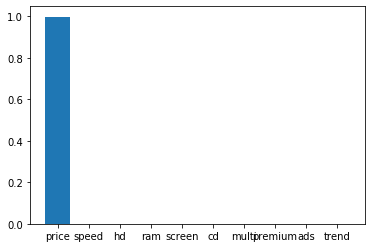

In [12]:
import matplotlib.pyplot as plt
plt.bar(height=pd.Series(lasso.coef_),x=pd.Series(comp.columns[:]))

In [14]:

lasso.alpha
pred_lasso=lasso.predict(train.iloc[:,:])
pred_lasso

array([2090.15056768, 1490.83952678, 1894.37562765, ..., 2124.11152666,
       2190.03574116, 3196.87828987])

In [16]:
#Adjusted r-square#
lasso.score(train.iloc[:,:],train.price) #0.9999986814871065

0.9999986814871065

In [18]:
#RMSE
import numpy as np
np.sqrt(np.mean((pred_lasso-train.price)**2)) #0.661891229734752

0.661891229734752

In [28]:
#running lasso regression of set of alpha values and observing how the r-squared,train_Rmse and test_rmse are changing with alpha values
train_rmse = []
test_rmse = []
R_sqrd = []
alphas = np.arange(0,30,0.05)
for i in alphas:
    LRM = Lasso(alpha = i,normalize=True,max_iter=500)
    LRM.fit(train.iloc[:,:10],train.price)
    R_sqrd.append(LRM.score(train.iloc[:,:10],train.price))
    train_rmse.append(np.sqrt(np.mean((LRM.predict(train.iloc[:,:10]) - train.price)**2)))
    test_rmse.append(np.sqrt(np.mean((LRM.predict(test.iloc[:,:10]) - test.price)**2)))

C:\Users\Rajesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\Rajesh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


Text(0, 0.5, 'test_rmse')

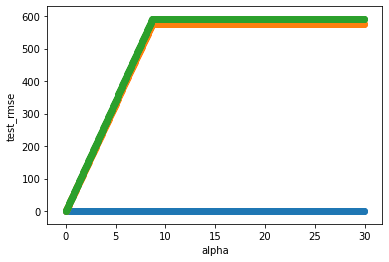

In [29]:
#### Plotting train_rmse,test_rmse,R_Squared values with respect to alpha values

# Alpha vs R_Squared values
plt.scatter(x=alphas,y=R_sqrd);plt.xlabel("alpha");plt.ylabel("R_Squared")

# Alpha vs train rmse
plt.scatter(x=alphas,y=train_rmse);plt.xlabel("alpha");plt.ylabel("train_rmse")

# Alpha vs test rmse
plt.scatter(x=alphas,y=test_rmse);plt.xlabel("alpha");plt.ylabel("test_rmse")

In [30]:
###RIDGE REGRESSION###
from sklearn.linear_model import Ridge
rm=Ridge(alpha=0.4,normalize=True)
rm.fit(train.iloc[:,:],train.price)


Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [32]:
#coefficients values for all the independent vairbales#
rm.coef_
rm.intercept_ #247.91791753751954

247.91791753751954

148.0955455748732

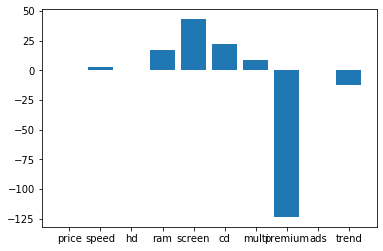

In [33]:
plt.bar(height=pd.Series(rm.coef_),x=pd.Series(comp.columns[:]))
rm.alpha

pred_rm=rm.predict(train.iloc[:,:])

#adjusted r-square#
rm.score(train.iloc[:,:],train.price) #0.9339922210333277

np.sqrt(np.mean((pred_rm-train.price)**2)) #148.0955455748732

In [39]:
### Running a Ridge Regressor of set of alpha values and observing how the R-Squared, train_rmse and test_rmse are changing with change in alpha values
train_rmse = []
test_rmse = []
R_sqrd = []
alphas = np.arange(0,100,0.05)
for i in alphas:
    RM = Ridge(alpha = i,normalize=True)
    RM.fit(train.iloc[:,:10],train.price)
    R_sqrd.append(RM.score(train.iloc[:,:10],train.price))
    train_rmse.append(np.sqrt(np.mean((RM.predict(train.iloc[:,:10]) - train.price)**2)))
    test_rmse.append(np.sqrt(np.mean((RM.predict(test.iloc[:,:10]) - test.price)**2)))
    

Text(0, 0.5, 'test_rmse')

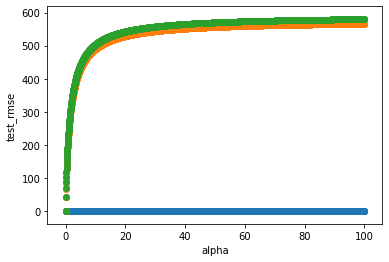

In [40]:
#### Plotting train_rmse,test_rmse,R_Squared values with respect to alpha values


# Alpha vs R_Squared values
plt.scatter(x=alphas,y=R_sqrd);plt.xlabel("alpha");plt.ylabel("R_Squared")

# Alpha vs train rmse
plt.scatter(x=alphas,y=train_rmse);plt.xlabel("alpha");plt.ylabel("train_rmse")

# Alpha vs test rmse
plt.scatter(x=alphas,y=test_rmse);plt.xlabel("alpha");plt.ylabel("test_rmse")
